In [1]:
import pandas as pd


In [10]:
# PART 1: Netflix Movies and TV Show

In [11]:
# 1. Load the dataset
df = pd.read_csv('netflix_titles.csv')


In [5]:

# 2. Display the first 5 and last 5 rows
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24

In [6]:

# 3. Shape of the dataset
print("\nNumber of rows and columns:")
print(df.shape)  # returns (rows, columns)



Number of rows and columns:
(8807, 12)


In [7]:

# 4. Unique countries where content is produced
print("\nNumber of unique countries where content is produced:")
print(df['country'].nunique())



Number of unique countries where content is produced:
748


In [8]:

# 5. Records where the type is 'TV Show'
tv_shows = df[df['type'] == 'TV Show']
print("\nTV Shows:")
print(tv_shows)


TV Shows:
     show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                              

In [12]:

# 6. Convert 'date_added' to datetime, extract year and month
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # avoid errors on bad data
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [13]:

# 7. Number of movies released in 2019
movies_2019 = df[(df['type'] == 'Movie') & (df['release_year'] == 2019)]
print("\nNumber of Movies released in 2019:")
print(len(movies_2019))


Number of Movies released in 2019:
633


In [14]:

# 8. Group by rating and show the count of each category
rating_counts = df['rating'].value_counts()
print("\nCount of each rating category:")
print(rating_counts)


Count of each rating category:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [15]:
# PART 2: World Population Dat

In [16]:

# 1. Load and display the top 10 rows
df = pd.read_csv('world_population.csv')
print("Top 10 rows:")
print(df.head(10))

Top 10 rows:
   Rank CCA3    Country/Territory           Capital      Continent  \
0    36  AFG          Afghanistan             Kabul           Asia   
1   138  ALB              Albania            Tirana         Europe   
2    34  DZA              Algeria           Algiers         Africa   
3   213  ASM       American Samoa         Pago Pago        Oceania   
4   203  AND              Andorra  Andorra la Vella         Europe   
5    42  AGO               Angola            Luanda         Africa   
6   224  AIA             Anguilla        The Valley  North America   
7   201  ATG  Antigua and Barbuda      Saint John’s  North America   
8    33  ARG            Argentina      Buenos Aires  South America   
9   140  ARM              Armenia           Yerevan           Asia   

   2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771         38972230         33753499         28189672   
1          2842321          2866849          2882481          2913399 

In [18]:
# 2. Check for null values and handle them appropriately
print("\nNull values in each column:")
print(df.isnull().sum())

if 'GDP' in df.columns:
    df['GDP'] = df['GDP'].fillna(df['GDP'].median())
else:
    print("Column 'GDP' does not exist in the DataFrame")

df = df.dropna()


Null values in each column:
Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64
Column 'GDP' does not exist in the DataFrame


In [30]:
# 3. Population of the top 5 most populous countries
print(df.columns.tolist())

country_col = None
for col in df.columns:
    if 'country' in col.lower():
        country_col = col
        break
else:
    country_col = df.columns[0]

population_col = None
for col in df.columns:
    if 'population' in col.lower():
        population_col = col
        break
else:
    population_col = 'Population'

top_5 = df.sort_values(by=population_col, ascending=False).head(5)
print("\nTop 5 most populous countries:")
print(top_5[[country_col, population_col]])

['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage']

Top 5 most populous countries:
    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862


In [31]:
# 4. Top 5 most populous countries
top_5 = df.sort_values(by=population_col, ascending=False).head(5)
print("\nTop 5 most populous countries:")
print(top_5[[country_col, population_col]])


Top 5 most populous countries:
    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862


In [38]:

# 5. Population of top 5 most populous countries
# Automatically detect the column containing 'population'
population_col = next((col for col in df.columns if 'population' in col.lower()), None)
country_col = next((col for col in df.columns if 'country' in col.lower()), df.columns[0])

# Safety check
if population_col is None:
    raise KeyError("❌ No column found with 'population' in its name.")

# Convert population to numeric (just in case)
df[population_col] = pd.to_numeric(df[population_col], errors='coerce')

# Drop rows with missing population
df = df.dropna(subset=[population_col])

# Get top 5 most populous countries
top_5 = df.sort_values(by=population_col, ascending=False).head(5)

print("\n🌍 Top 5 most populous countries:")
print(top_5[[country_col, population_col]])



🌍 Top 5 most populous countries:
    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862


In [40]:
# 6. Top 5 most populous countries (✔ corrected like you wanted)
top_5 = df.sort_values(by=population_col, ascending=False).head(5)
print("\n🌍 Top 5 most populous countries:")
print(top_5[[country_col, population_col]])



🌍 Top 5 most populous countries:
    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862


In [53]:
#7th
df = pd.read_csv("world_population.csv")

# Set manually or detect dynamically
country_col = next((col for col in df.columns if 'country' in col.lower()), df.columns[0])
density_col = next((col for col in df.columns if 'density' in col.lower()), None)

# Check both are found
if not country_col or not density_col:
    raise ValueError("Required columns not found.")

# Convert density to numeric
df[density_col] = pd.to_numeric(df[density_col], errors='coerce')
df = df.dropna(subset=[density_col])

# Sort by population density descending
sorted_density = df.sort_values(by=density_col, ascending=False)

# ✅ Final print (use actual detected column names)
print("\n📈 Top 10 countries by population density:")
print(sorted_density[[country_col, density_col]].head(10))


📈 Top 10 countries by population density:
    Country/Territory  Density (per km²)
119             Macau         23172.2667
134            Monaco         18234.5000
187         Singapore          8416.4634
89          Hong Kong          6783.3922
76          Gibraltar          5441.5000
15            Bahrain          1924.4876
123          Maldives          1745.9567
125             Malta          1687.6139
188      Sint Maarten          1299.2647
22            Bermuda          1188.5926


In [54]:
# Ensure population and density columns are already detected
population_col = next((col for col in df.columns if 'population' in col.lower()), None)
density_col = next((col for col in df.columns if 'density' in col.lower()), None)
country_col = next((col for col in df.columns if 'country' in col.lower()), df.columns[0])

# Convert to numeric if needed
df[population_col] = pd.to_numeric(df[population_col], errors='coerce')
df[density_col] = pd.to_numeric(df[density_col], errors='coerce')

# Filter: population > 10 million
filtered_df = df[df[population_col] > 10_000_000]

# Sort by density descending
top_densely_populated = filtered_df.sort_values(by=density_col, ascending=False).head(10)

# Display result
print("\n📌 Top 10 most densely populated countries with population > 10 million:")
print(top_densely_populated[[country_col, population_col, density_col]])



📌 Top 10 most densely populated countries with population > 10 million:
    Country/Territory  2022 Population  Density (per km²)
16         Bangladesh        171186372          1160.0350
203            Taiwan         23893394           660.1662
172            Rwanda         13776698           523.0731
194       South Korea         51815810           517.0722
32            Burundi         12889576           463.0874
92              India       1417173173           431.0675
144       Netherlands         17564014           419.6897
87              Haiti         11584996           417.4773
19            Belgium         11655930           381.8111
163       Philippines        115559009           337.5434


In [55]:
# Detect column names
area_col = next((col for col in df.columns if 'area' in col.lower()), None)
density_col = next((col for col in df.columns if 'density' in col.lower()), None)
country_col = next((col for col in df.columns if 'country' in col.lower()), df.columns[0])

# Convert area and density to numeric
df[area_col] = pd.to_numeric(df[area_col], errors='coerce')
df[density_col] = pd.to_numeric(df[density_col], errors='coerce')

# Filter countries with area > 1 million sq. km
large_countries = df[df[area_col] > 1_000_000]

# Find country with the lowest population density among them
lowest_density = large_countries.sort_values(by=density_col, ascending=True).head(1)

# Display result
print("\n🌍 Country with the lowest population density (area > 1 million sq.km):")
print(lowest_density[[country_col, area_col, density_col]])



🌍 Country with the lowest population density (area > 1 million sq.km):
   Country/Territory  Area (km²)  Density (per km²)
78         Greenland     2166086             0.0261


In [56]:
# PART 3: Indian Premier League (IPL)

In [73]:
#1
# Load matches dataset
matches = pd.read_csv("ipl-matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Show first few rows

print(matches.head())

        ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Garde

In [63]:
 2# Try to detect 'winner' column automatically
winner_col = next((col for col in matches.columns if 'winner' in col.lower()), None)

if winner_col is None:
    raise ValueError(" winner' column not found in matches.csv. Please check the column names.")

# Count number of wins per team
most_successful_team = matches[winner_col].value_counts()

print("\n Most successful teams (by number of wins):")
print(most_successful_team)



 Most successful teams (by number of wins):
TossWinner
Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64


In [67]:
#3: Count total matches played each season
season_col = next((col for col in matches.columns if 'season' in col.lower() or 'year' in col.lower()), None)

if season_col is None:
    raise ValueError("❌ Could not find a 'season' or 'year' column in matches.csv")

# Count number of matches per season
matches_per_season = matches[season_col].value_counts().sort_index()

print("\n Total matches played in each season:")
print(matches_per_season)



 Total matches played in each season:
Season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
Name: count, dtype: int64


In [66]:


# 4 Top 5 players who won the most "Player of the Match" awards
pom_col = next((col for col in matches.columns if 'player' in col.lower() and 'match' in col.lower()), None)

if pom_col is None:
    raise ValueError("❌ 'Player of the Match' column not found!")

# Count most frequent award winners
top_players = matches[pom_col].value_counts().head(5)

print("\n Top 5 players with most 'Player of the Match' awards:")
print(top_players)



 Top 5 players with most 'Player of the Match' awards:
Player_of_Match
AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
Name: count, dtype: int64


In [82]:
#5 Example: If matches has 'match_id' column
merged = pd.merge(deliveries, matches, on='match_id')
print("\n✅ Merged data preview:")
print(merged.head())





✅ Merged data preview:
   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  ...  SuperOver  \
0     1   SC Ganguly  P Kumar  BB McCullum             0  ...          N   
1     2  BB McCullum  P Kumar   SC Ganguly             0  ...          N   
2     3  BB McCullum  P Kumar   SC Ganguly             0  ...          N   
3     4  BB McCullum  P Kumar   SC Ganguly             0  ...          N   
4     5  BB McCullum  P Kumar   SC Ganguly             0  ...          N   

             WinningTeam WonBy  

In [83]:

df = pd.read_csv("StudentsPerformance.csv")
print(" Data loaded successfully.")
print(df.head())

✅ Data loaded successfully.
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [84]:
 #Task 1: Display average marks in math, reading, and writing

print("\n📊 Average Marks:")
print("Math:", df['math score'].mean())
print("Reading:", df['reading score'].mean())
print("Writing:", df['writing score'].mean())


📊 Average Marks:
Math: 66.089
Reading: 69.169
Writing: 68.054


In [85]:
print("Average writing score by gender:")
print(df.groupby('gender')['writing score'].mean())

Average writing score by gender:
gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64


In [86]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['percentage'] = df['total_score'] / 3

print(" Added 'total_score' and 'percentage' columns.")
print(df[['math score', 'reading score', 'writing score', 'total_score', 'percentage']].head())


 Added 'total_score' and 'percentage' columns.
   math score  reading score  writing score  total_score  percentage
0          72             72             74          218   72.666667
1          69             90             88          247   82.333333
2          90             95             93          278   92.666667
3          47             57             44          148   49.333333
4          76             78             75          229   76.333333


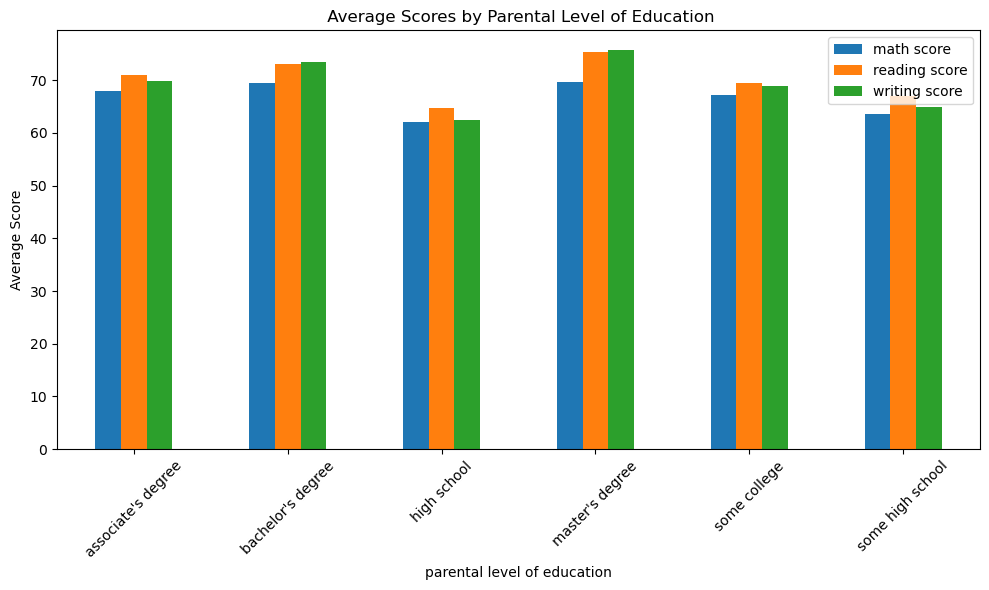

In [89]:
import matplotlib.pyplot as plt

grouped = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

grouped.plot(kind='bar', figsize=(10,6))
plt.title(" Average Scores by Parental Level of Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
high_scorers = df[df['percentage'] > 90]
print(" Students who scored above 90%:")
print(high_scorers[['gender', 'math score', 'reading score', 'writing score', 'percentage']])

 Students who scored above 90%:
     gender  math score  reading score  writing score  percentage
2    female          90             95             93   92.666667
6    female          88             95             92   91.666667
104    male          98             86             90   91.333333
106  female          87            100            100   95.666667
114  female          99            100            100   99.666667
121    male          91             89             92   90.666667
122  female          88             93             93   91.333333
149    male         100            100             93   97.666667
165  female          96            100            100   98.666667
179  female          97            100            100   99.000000
229  female          88             95             94   92.333333
263  female          99             93             90   94.000000
268  female          88             92             95   91.666667
334  female          83             93      

In [92]:
# PART 5: Flight Price Predi

In [94]:

df = pd.read_csv("Clean_Dataset.csv")
print(" Data loaded successfully!")

 Data loaded successfully!


In [95]:
print(" Dataset Info:")
df.info()

print(" Descriptive Statistics:")
print(df.describe())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
 Descriptive Statistics:
          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.0000

In [98]:
df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce')
df['arrival_time'] = pd.to_datetime(df['arrival_time'], errors='coerce')

In [99]:
df['Journey_Day'] = df['departure_time'].dt.day
df['Journey_Month'] = df['departure_time'].dt.month

print(df[['departure_time', 'Journey_Day', 'Journey_Month']].head())


  departure_time  Journey_Day  Journey_Month
0            NaT          NaN            NaN
1            NaT          NaN            NaN
2            NaT          NaN            NaN
3            NaT          NaN            NaN
4            NaT          NaN            NaN


In [101]:
# 🔍 Most frequent airline
most_frequent_airline = df['airline'].value_counts().idxmax()
print(" Most Frequent Airline:", most_frequent_airline)

# 🔍 Most frequent source city
most_frequent_source = df['source_city'].value_counts().idxmax()
print(" Most Frequent Source City:", most_frequent_source)


 Most Frequent Airline: Vistara
 Most Frequent Source City: Delhi
